# Domain Driver Data Mining Project

### Visualize Dataset

In [1]:
data_name = 'articles_training'

In [179]:
from utils import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
column_names = ['content', 'tags']
df_raw = pd.read_csv("../dataset/articles_training_small.tsv", sep='\t')
print(df_raw.shape)
print(df_raw.describe())
df_raw.head()

(1997, 2)
                                                  content  \
count                                                1997   
unique                                               1995   
top     Về Nhơn Trạch hôm nay, du khách vẫn có thể thư...   
freq                                                    2   

                                                     tags  
count                                                1997  
unique                                               1996  
top     Phú Hội,Nhơn Trạch,lá sen,uống trà,hoa trà,bột...  
freq                                                    2  


,content,tags
0,"Bước vào trận đấu, Barcelona nhanh chóng tràn ...","La Liga,Sevilla,Olimpic Lluis Companys,đè bẹp,..."
1,Willian đi vào lịch sử bóng đá xứ samba. Với 1...,"Estevao Willian,Neymar,giải VĐQG Brazil,Serie ..."
2,Giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải Ba,Thượng Hải,đồng..."
3,Mục tiêu lớn Phó Thủ tướng Chính phủ Lê Thành ...,"đăng cai,Đại hội Thể thao châu Á,ASIAD,thể dục..."
4,"Ngày 20-10, Giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,Vũ Đặng Nhật Nam,Nguyễn Lê Truyề..."


In [4]:
# tìm ra những sample bị lặp
duplicate_rows = df_raw.duplicated().sum()
# tìm ra những content bị lặp
# duplicate_content = df['content'].duplicated().sum() if 'content' in df.columns else 0
df_raw.shape, duplicate_rows


((1997, 2), np.int64(1))

In [5]:
duplicates = df_raw[df_raw.duplicated()]
duplicates.head()

,content,tags
1123,"Về Nhơn Trạch hôm nay, du khách vẫn có thể thư...","Phú Hội,Nhơn Trạch,lá sen,uống trà,hoa trà,bột..."


In [7]:
df = df_raw.drop_duplicates(keep='first')

In [8]:
print(df.describe())
print(df.shape)
df.head()

                                           content  \
count                                         1996   
unique                                        1995   
top     Mời quý vị và các bạn xem video dưới đây:    
freq                                             2   

                                                     tags  
count                                                1996  
unique                                               1996  
top     Luật Di sản văn hóa,Trình Lam Sinh,đại biểu Qu...  
freq                                                    1  
(1996, 2)


,content,tags
0,"Bước vào trận đấu, Barcelona nhanh chóng tràn ...","La Liga,Sevilla,Olimpic Lluis Companys,đè bẹp,..."
1,Willian đi vào lịch sử bóng đá xứ samba. Với 1...,"Estevao Willian,Neymar,giải VĐQG Brazil,Serie ..."
2,Giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải Ba,Thượng Hải,đồng..."
3,Mục tiêu lớn Phó Thủ tướng Chính phủ Lê Thành ...,"đăng cai,Đại hội Thể thao châu Á,ASIAD,thể dục..."
4,"Ngày 20-10, Giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,Vũ Đặng Nhật Nam,Nguyễn Lê Truyề..."


In [10]:
df['tag_count'] = df['tags'].apply(lambda x : len(x.split(',')))
df['tag_count'].value_counts()

/var/folders/pb/y_ns9w3d2gzdpfmjzx3cl_sr0000gn/T/ipykernel_4136/2097947925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_count'] = df['tags'].apply(lambda x : len(x.split(',')))


tag_count
20    1960
21      13
19       4
14       4
17       3
22       3
9        2
12       2
8        1
5        1
18       1
13       1
16       1
Name: count, dtype: int64

In [11]:
df.head(5)

,content,tags,tag_count
0,"Bước vào trận đấu, Barcelona nhanh chóng tràn ...","La Liga,Sevilla,Olimpic Lluis Companys,đè bẹp,...",20
1,Willian đi vào lịch sử bóng đá xứ samba. Với 1...,"Estevao Willian,Neymar,giải VĐQG Brazil,Serie ...",20
2,Giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải Ba,Thượng Hải,đồng...",19
3,Mục tiêu lớn Phó Thủ tướng Chính phủ Lê Thành ...,"đăng cai,Đại hội Thể thao châu Á,ASIAD,thể dục...",20
4,"Ngày 20-10, Giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,Vũ Đặng Nhật Nam,Nguyễn Lê Truyề...",20


In [14]:
print( "Mỗi câu có nhiều nhất:", df['tag_count'].max())
print( "Mỗi câu có ít nhất:", df["tag_count"].min())
print( "Số tag trung bình trong một câu:", df["tag_count"].mean())

Mỗi câu có nhiều nhất: 22
Mỗi câu có ít nhất: 5
Số tag trung bình trong một câu: 19.95190380761523


Text(0, 0.5, 'Frequency')

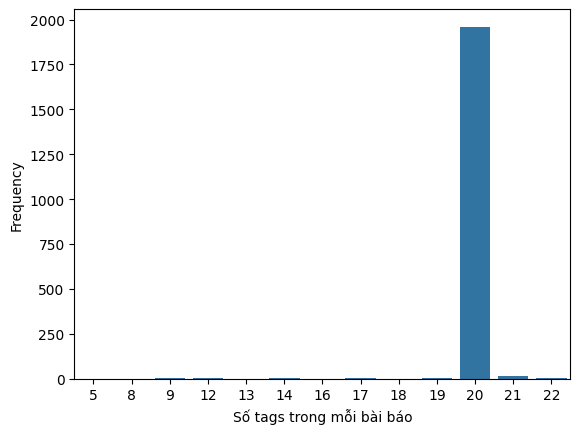

In [13]:
sns.barplot(df["tag_count"].value_counts())
plt.xlabel("Số tags trong mỗi bài báo")
plt.ylabel("Frequency")

In [15]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))
tag_bow = vectorizer.fit_transform(df['tags'])
print("Số lượng content:", tag_bow.shape[0])
print("Số lượng tags:", tag_bow.shape[1])


Số lượng content: 1996
Số lượng tags: 16247


/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
tags = vectorizer.get_feature_names_out()
print("Few tags :", tags[:10])

Few tags : [' 1954' ' 1975' ' georgia' ' hà nội' ' louisiana' ' đà nẵng' ' đông anh'
 '06/cp' '148c trần quang khải' '18 (số)']


In [17]:
freq = tag_bow.sum(axis=0).A1
tag_to_count_map = dict(zip(tags, freq))
list = []
for key, value in tag_to_count_map.items():
  list.append([key, value]) 
tag_df = pd.DataFrame(list, columns=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,1954,10
1,1975,2
2,georgia,2
3,hà nội,1
4,louisiana,1


Text(0, 0.5, 'Frequency')

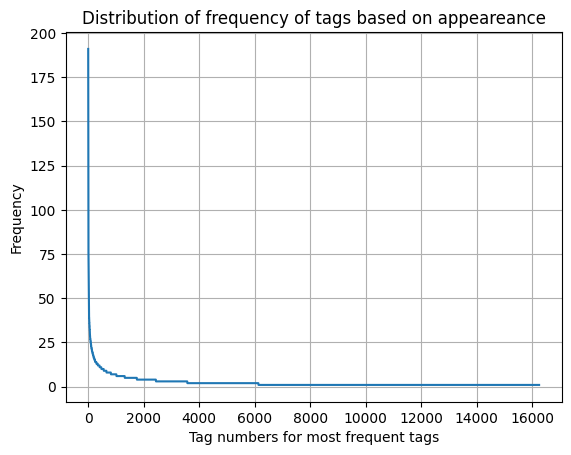

In [18]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_df_sorted.head()
plt.plot(tag_df_sorted['Counts'].values)
plt.grid()
plt.title("Distribution of frequency of tags based on appeareance")
plt.xlabel("Tag numbers for most frequent tags")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

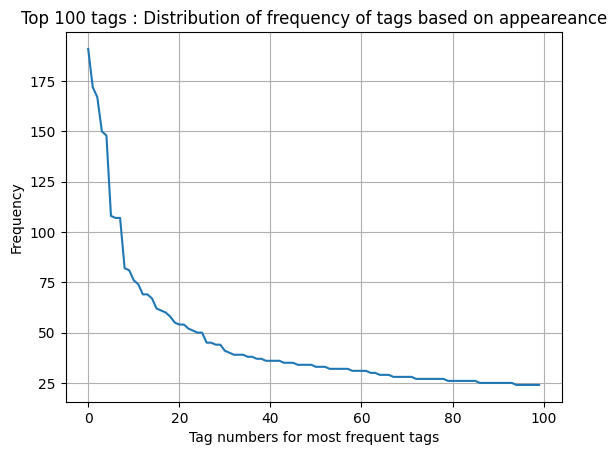

In [19]:
plt.plot(tag_df_sorted['Counts'][0:100].values)
plt.grid()
plt.title("Top 100 tags : Distribution of frequency of tags based on appeareance")
plt.xlabel("Tag numbers for most frequent tags")
plt.ylabel("Frequency")

TypeError: annotate() missing 1 required positional argument: 'text'

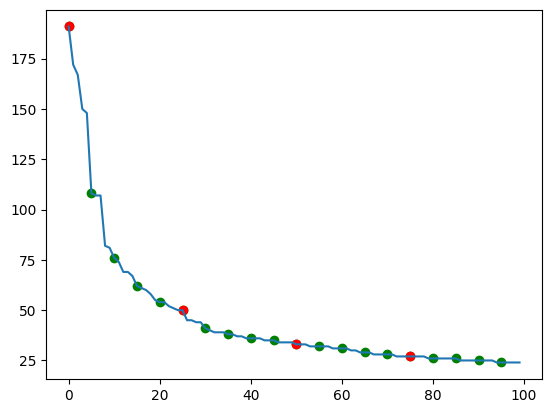

In [20]:
plt.plot(tag_df_sorted['Counts'][0:100].values)
plt.scatter(x=np.arange(0,100,5), y=tag_df_sorted['Counts'][0:100:5], c='g', label="quantiles with 0.05 intervals")
plt.scatter(x=np.arange(0,100,25), y=tag_df_sorted['Counts'][0:100:25], c='r', label = "quantiles with 0.25 intervals")
for x,y in zip(np.arange(0,100,25), tag_df_sorted['Counts'][0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.01, y+30))

plt.title('first 100 tags: Distribution of frequency of tags based on appeareance')
plt.grid()
plt.xlabel("Tag numbers for most frequent tags")
plt.ylabel("Frequency")
plt.legend()

In [21]:
print(tag_df_sorted.shape)
tag_df_sorted.head()

(16247, 2)


,Tags,Counts
8803,năm,191
14587,xét tuyển,172
15008,điểm chuẩn,167
12404,trúng tuyển,150
15480,đại học,148


In [22]:
print("{} tags are used more than 25 times".format(tag_df_sorted[tag_df_sorted["Counts"]>25].shape[0]))
print("{} tags are used more than 50 times".format(tag_df_sorted[tag_df_sorted["Counts"]>50].shape[0]))

86 tags are used more than 25 times
24 tags are used more than 50 times


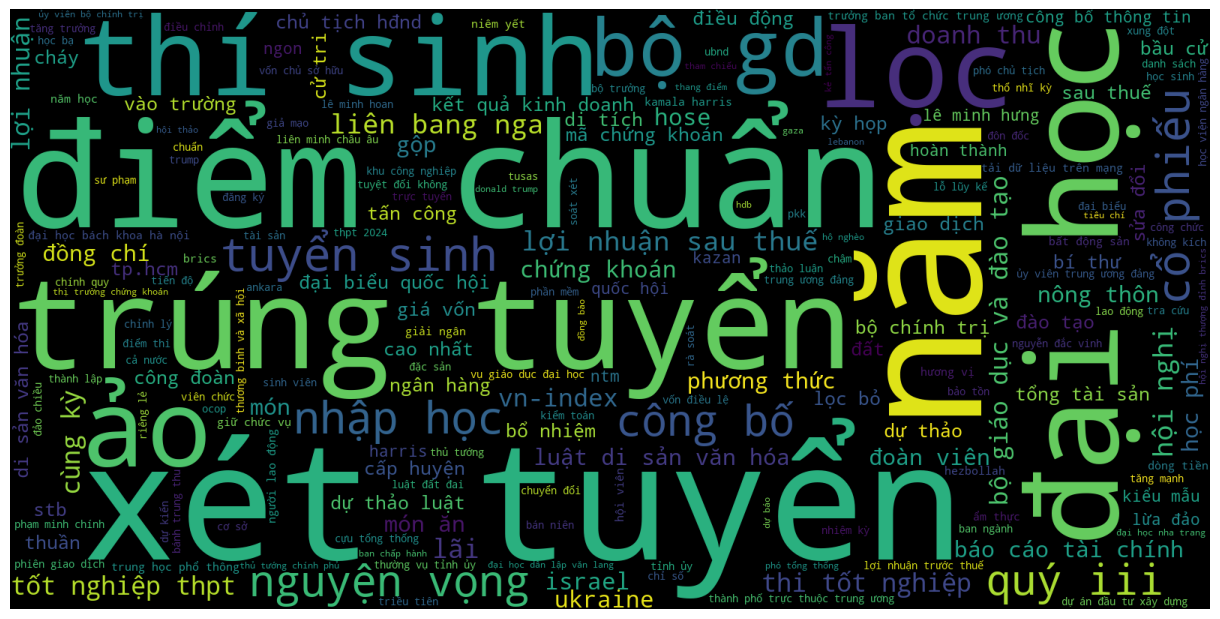

In [23]:
tag_to_count_map
tupl = dict(tag_to_count_map.items())
word_cloud = WordCloud(width=1600,height=800,).generate_from_frequencies(tupl)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)


ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (16247).

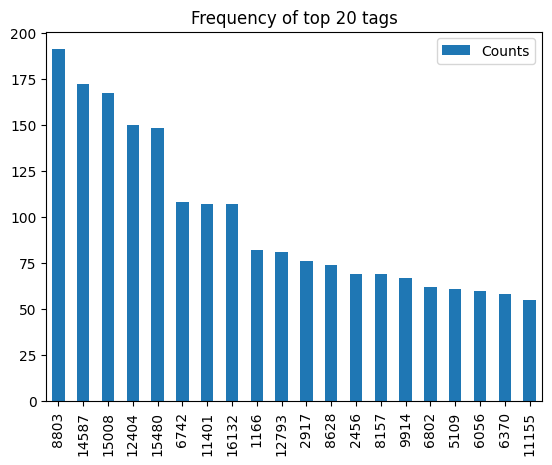

In [24]:
i=np.arange(20)
tag_df_sorted.head(20).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

### Text Preprocessing

In [31]:
stopwords_file_path = "/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/vietnamese-stopwords/vietnamese-stopwords-dash.txt"

In [26]:
df['content'] = df['content'].str.lower()
df['tags'] = df['tags'].str.lower()
df.head()

/var/folders/pb/y_ns9w3d2gzdpfmjzx3cl_sr0000gn/T/ipykernel_4136/1468367987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower()
/var/folders/pb/y_ns9w3d2gzdpfmjzx3cl_sr0000gn/T/ipykernel_4136/1468367987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].str.lower()


,content,tags,tag_count
0,"bước vào trận đấu, barcelona nhanh chóng tràn ...","la liga,sevilla,olimpic lluis companys,đè bẹp,...",20
1,willian đi vào lịch sử bóng đá xứ samba. với 1...,"estevao willian,neymar,giải vđqg brazil,serie ...",20
2,giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải ba,thượng hải,đồng...",19
3,mục tiêu lớn phó thủ tướng chính phủ lê thành ...,"đăng cai,đại hội thể thao châu á,asiad,thể dục...",20
4,"ngày 20-10, giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,vũ đặng nhật nam,nguyễn lê truyề...",20


In [29]:
stopwords = []
with open(stopwords_file_path, "r", encoding="utf-8") as file:
    stopwords = [line.strip() for line in file if line.strip()]

In [ ]:
# xử lý content
def remove_stopwords_underthesea(content, stopwords):
    tokens = word_tokenize(content, format="text").split()
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    return " ".join(filtered_tokens)

In [61]:
len_before = 0
len_after = 0
content_list = []
for content in df['content']:
    len_before += len(content)
    content_text = remove_stopwords_underthesea(content, stopwords)
    content_text = re.sub(r"[.,]" , ' ', content_text)

    len_after += len(content_text)
    # print(content)
    # print(content_text)
    content_list.append(content_text)

df['preprocessed_content'] = content_list
avg_len_before_preprocessing=(len_before*1.0)/df.shape[0]
avg_len_after_preprocessing=(len_after*1.0)/df.shape[0]



/var/folders/pb/y_ns9w3d2gzdpfmjzx3cl_sr0000gn/T/ipykernel_4136/612275408.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_content'] = content_list


In [62]:
print( "Avg. độ dài trung bình content trước khi preprocessing: ", avg_len_before_preprocessing)
print( "Avg. độ dài trung bình content sau khi preprocessing: ", avg_len_after_preprocessing)

Avg. độ dài trung bình content trước khi preprocessing:  2870.2209418837674
Avg. độ dài trung bình content sau khi preprocessing:  2217.581162324649


In [139]:
df['preprocessed_tags'] = df['tags'].apply(lambda x: ",".join(word_tokenize(x, format="text").split(',')))

/var/folders/pb/y_ns9w3d2gzdpfmjzx3cl_sr0000gn/T/ipykernel_4136/3005803229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_tags'] = df['tags'].apply(lambda x: ",".join(word_tokenize(x, format="text").split(',')))


In [140]:
df.head()

,content,tags,tag_count,preprocessed_content,preprocessed_tags
0,"bước vào trận đấu, barcelona nhanh chóng tràn ...","la liga,sevilla,olimpic lluis companys,đè bẹp,...",20,trận đấu barcelona nhanh_chóng tràn tấn_công...,"la liga , sevilla , olimpic lluis companys , đ..."
1,willian đi vào lịch sử bóng đá xứ samba. với 1...,"estevao willian,neymar,giải vđqg brazil,serie ...",20,willian đi lịch_sử bóng_đá xứ samba 1 bàn th...,"estevao willian , neymar , giải vđqg brazil , ..."
2,giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải ba,thượng hải,đồng...",19,giải vô_địch ná cao_su thế_giới 2024 diễn hai ...,"ná cao_su , giải vô_địch , giải ba , thượng_hả..."
3,mục tiêu lớn phó thủ tướng chính phủ lê thành ...,"đăng cai,đại hội thể thao châu á,asiad,thể dục...",20,mục_tiêu phó thủ_tướng chính_phủ lê thành long...,"đăng_cai , đại_hội thể_thao châu_á , asiad , t..."
4,"ngày 20-10, giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,vũ đặng nhật nam,nguyễn lê truyề...",20,20-10 giải_bơi lặn vô_địch quốc_gia 2024 kết...,"toàn đoàn , lặn , vũ_đặng_nhật_nam , nguyễn_lê..."


In [141]:

preprocessed_df = df[["preprocessed_content","preprocessed_tags"]]
print("Shape of preprocessed data :", preprocessed_df.shape)
preprocessed_df.head()


Shape of preprocessed data : (1996, 2)


,preprocessed_content,preprocessed_tags
0,trận đấu barcelona nhanh_chóng tràn tấn_công...,"la liga , sevilla , olimpic lluis companys , đ..."
1,willian đi lịch_sử bóng_đá xứ samba 1 bàn th...,"estevao willian , neymar , giải vđqg brazil , ..."
2,giải vô_địch ná cao_su thế_giới 2024 diễn hai ...,"ná cao_su , giải vô_địch , giải ba , thượng_hả..."
3,mục_tiêu phó thủ_tướng chính_phủ lê thành long...,"đăng_cai , đại_hội thể_thao châu_á , asiad , t..."
4,20-10 giải_bơi lặn vô_địch quốc_gia 2024 kết...,"toàn đoàn , lặn , vũ_đặng_nhật_nam , nguyễn_lê..."


### Machine Learning Models

#### Xử lý tags

In [144]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','), binary=True)
y_multilabel = vectorizer.fit_transform(preprocessed_df['preprocessed_tags'])

/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [145]:
def tags_to_consider(n):
    tag_i_sum = y_multilabel.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(tag_i_sum)), key=lambda i: tag_i_sum[i], reverse=True)
    yn_multilabel=y_multilabel[:,sorted_tags_i[:n]]
    return yn_multilabel

def content_covered_fn(numb):
    yn_multilabel = tags_to_consider(numb)
    x= yn_multilabel.sum(axis=1)
    return (np.count_nonzero(x==0))

In [146]:
contents_covered = []
total_tags=y_multilabel.shape[1]
total_content=preprocessed_df.shape[0]
for i in range(100, total_tags, 100):
    contents_covered.append(np.round(((total_content-content_covered_fn(i))/total_content)*100,3))

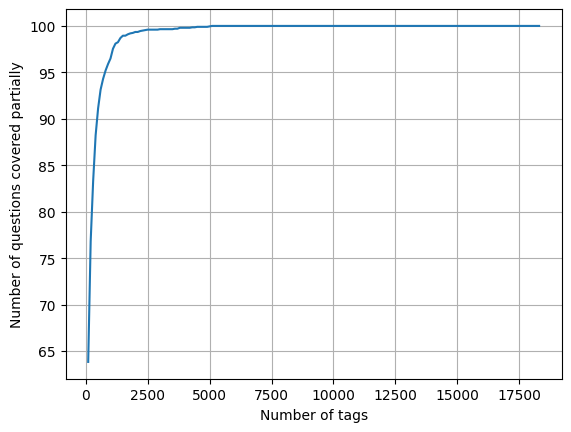

96.493 % of questions covered by 1000 tags
Number of questions that are not covered by 1000 tags :  70 out of  1996


In [147]:
plt.plot(np.arange(100,total_tags, 100),contents_covered)
plt.xlabel("Number of tags")
plt.ylabel("Number of questions covered partially")
plt.grid()
plt.show()
print(contents_covered[9],"% of questions covered by 1000 tags")
print("Number of questions that are not covered by 1000 tags : ", content_covered_fn(1000),"out of ", total_content)

In [209]:
yx_multilabel = tags_to_consider(2000)
print("Number of tags in the subset :", y_multilabel.shape[1])
print("Number of tags considered :", yx_multilabel.shape[1],"(",(yx_multilabel.shape[1]/y_multilabel.shape[1])*100,"%)")

Number of tags in the subset : 18307
Number of tags considered : 2000 ( 10.92478286994046 %)


In [210]:
yx_multilabel.shape

(1996, 2000)

## Training


### Chia 80:20

In [211]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, yx_multilabel, test_size = 0.2,random_state = 42)
print("Number of data points in training data :", X_train.shape[0])
print("Number of data points in test data :", X_test.shape[0])

Number of data points in training data : 1596
Number of data points in test data : 400


In [212]:
X_train.head()

,preprocessed_content,preprocessed_tags
1829,vấn_đề y_tế trả_lời : khoản 16 1 nghị_định 8...,"lê_nhi , lên hạng , chức_danh , đại_học kỹ_thu..."
678,sơ_suất huệ nhầm 5 triệu đồng tài_khoản nỗ...,"công_an xã triệu_an , vạn_thủy , hoàng_thị huệ..."
1083,chuẩn_bị nguyên_liệu bánh_trung_thu tổ yến 3 7...,"yến_sào , bánh_trung_thu , bí_đao , bánh có nh..."
1561,cụ_thể chiến_dịch tranh_cử phó tổng_thống ha...,"harris , kamala_harris , chiến_dịch , cử_tri ,..."
365,cụ_thể võ_hoàng lâm đảm_nhiệm chức_vụ tổng_g...,"coteccons , coteccons business unit 01 , ctcp ..."


In [213]:
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, tokenizer = lambda x: x.split(), ngram_range=(1,3))
X_train_multilabel = vectorizer.fit_transform(X_train['preprocessed_content'])
X_test_multilabel = vectorizer.transform(X_test['preprocessed_content'])

/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [214]:
print("Training data shape X : ",X_train_multilabel.shape, "Y :",y_train.shape)
print("Test data shape X : ",X_test_multilabel.shape,"Y:",y_test.shape)

Training data shape X :  (1596, 200000) Y : (1596, 2000)
Test data shape X :  (400, 200000) Y: (400, 2000)


In [215]:
clf = OneVsRestClassifier(SGDClassifier(loss='log_loss', alpha=0.00001, penalty='l2'))
clf.fit(X_train_multilabel, y_train)
y_pred = clf.predict(X_test_multilabel)

/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1603 is present in all training examples.
  warnings.warn(


In [216]:
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))
print("Macro f1 score :",metrics.f1_score(y_test, y_pred, average = 'macro'))
print("Micro f1 score :",metrics.f1_score(y_test, y_pred, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test,y_pred))
print("Precision recall report :\n",metrics.classification_report(y_test, y_pred))

Accuracy : 0.005
Macro f1 score : 0.15516047894275065
Micro f1 score : 0.37717219589257506
Hamming loss : 0.0039425
Precision recall report :
               precision    recall  f1-score   support

           0       0.41      0.18      0.25        38
           1       0.86      0.79      0.83        39
           2       0.82      0.89      0.85        36
           3       0.89      0.84      0.86        38
           4       0.96      0.84      0.90        31
           5       0.66      0.78      0.71        27
           6       0.77      0.77      0.77        22
           7       0.80      0.57      0.67        28
           8       0.69      0.64      0.67        14
           9       0.76      0.76      0.76        17
          10       0.91      0.36      0.51        28
          11       0.80      0.67      0.73        18
          12       0.94      0.73      0.82        22
          13       0.83      0.68      0.75        22
          14       0.38      0.38      0.38   

/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `

In [217]:
print(y_pred[5])

  (np.int32(0), np.int32(11))	1


In [218]:
print(y_test[5])

  (np.int32(0), np.int32(193))	1
  (np.int32(0), np.int32(225))	1
  (np.int32(0), np.int32(625))	1
  (np.int32(0), np.int32(150))	1
  (np.int32(0), np.int32(11))	1
  (np.int32(0), np.int32(318))	1
  (np.int32(0), np.int32(285))	1
  (np.int32(0), np.int32(212))	1


### Sử dụng kfold

In [183]:
accuracy_scores = []
macro_f1_scores = []
micro_f1_scores = []
hamming_losses = []

In [190]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [185]:
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, tokenizer=lambda x: x.split(), ngram_range=(1, 3))
clf = OneVsRestClassifier(SGDClassifier(loss='log_loss', alpha=0.00001, penalty='l2'))

In [192]:
for train_index, test_index in kf.split(preprocessed_df):
    X_train, X_test = preprocessed_df.iloc[train_index], preprocessed_df.iloc[test_index]
    y_train, y_test = yx_multilabel[train_index], yx_multilabel[test_index]

    X_train_multilabel = vectorizer.fit_transform(X_train['preprocessed_content'])
    X_test_multilabel = vectorizer.transform(X_test['preprocessed_content'])

    clf.fit(X_train_multilabel, y_train)
    y_pred = clf.predict(X_test_multilabel)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))
    macro_f1_scores.append(metrics.f1_score(y_test, y_pred, average='macro'))
    micro_f1_scores.append(metrics.f1_score(y_test, y_pred, average='micro'))
    hamming_losses.append(metrics.hamming_loss(y_test, y_pred))

/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/andrew/Documents/study/kpdl_hlv/Domain-Driver-Data-Mining/venv/lib/python3.9/site-packages/sklearn/multiclass.py:87: Us

In [193]:
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
print("Average Macro F1 Score:", sum(macro_f1_scores) / len(macro_f1_scores))
print("Average Micro F1 Score:", sum(micro_f1_scores) / len(micro_f1_scores))
print("Average Hamming Loss:", sum(hamming_losses) / len(hamming_losses))

Average Accuracy: 0.04308617234468938
Average Macro F1 Score: 0.23360606273210954
Average Micro F1 Score: 0.4188955952626251
Average Hamming Loss: 0.005400801603206412
